In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

In [2]:
import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [3]:
print(df.shape)
df.head()

(2772, 5)


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [4]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [5]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

# 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
데이터는 위에서 제공된 데이터를 사용합니다.
해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [6]:
df["데이터"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2772 entries, 0 to 2771
Series name: 데이터
Non-Null Count  Dtype
--------------  -----
2772 non-null   int64
dtypes: int64(1)
memory usage: 21.8 KB


In [7]:
df["시점"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2772 entries, 0 to 2771
Series name: 시점
Non-Null Count  Dtype 
--------------  ----- 
2772 non-null   object
dtypes: object(1)
memory usage: 21.8+ KB


In [8]:
df["백만"] = df["데이터"]
df = df.drop(["데이터"], axis=1)
df

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [9]:
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df["분기"] = df["시점"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [10]:
df[["백만","연도","분기"]].describe().round(2)

# count : 데이터의 개수, mean : 데이터 값의 평균, std: 데이터 표본의 표준편차 
# min : 데이터의 최소값, 25% : 데이터 값의 25% 되는 값, 50% : 데이터 값의 50% 되는 값
# 75% : 데이터의 75% 되는 값 , max : 데이터의 최대값이다.

# 여기서 백만, 연도, 분기의 데이터의 개수는 같다
# "백만"의 표준편차가 가장 큼으로 분산의 정도가 크다는 것을 알 수 있다.


,백만,연도,분기
count,2772.00,2772.00,2772.00
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,2.00
75%,1181.00,2021.00,3.00
max,47689.00,2022.00,4.00


# 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [11]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '백만', '연도', '분기'], dtype='object')

In [12]:
df1 = df.pivot_table(index="국가(대륙)별", columns="연도",values="백만", aggfunc=sum)
df1 = df1.rename_axis(None, axis=1)
df1 = df1.rename_axis(None, axis=0)
df1.columns.name = "국가(대륙)별"
# rename 과 columns 정리
df1

국가(대륙)별,2017,2018,2019,2020,2021,2022
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


# 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [13]:
df_2020 = df[df["연도"] == 2020]
df_2020_country = df_2020.groupby(["국가(대륙)별","분기"])[["백만"]].sum()


<AxesSubplot:xlabel='국가(대륙)별', ylabel='백만'>

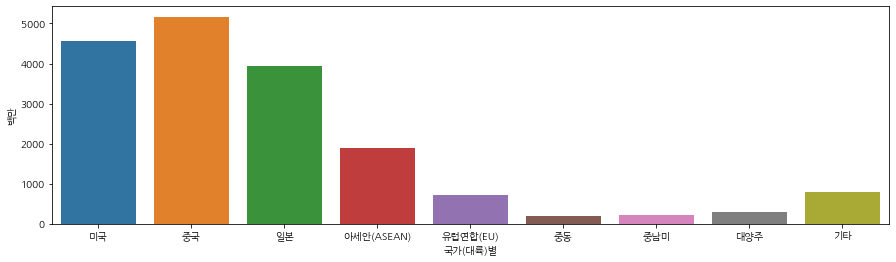

In [14]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_2020, x="국가(대륙)별", y="백만", ci=None )

# 해외온라인 판매에서 가장 높은 높은 부분을 차지 하는 것은 중국, 미국, 일본 순이다.
# 상당부분의 거래가 중국과 이어지고 있다는 것을 알 수 있다.

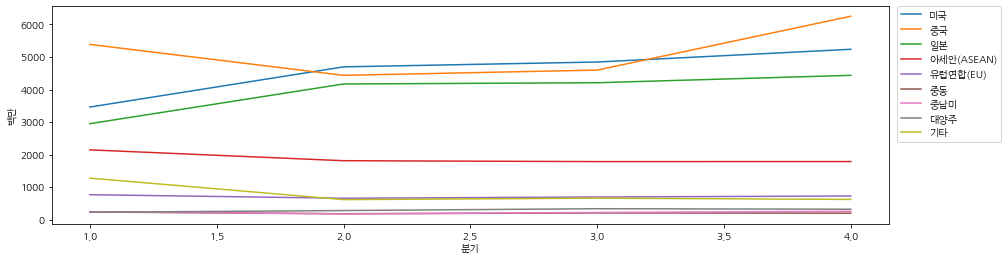

In [15]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_2020, x="분기", y="백만",hue="국가(대륙)별", ci=None )
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)

# 분기별로 봤을때 중국, 미국, 일본의 거래량은 증가하고 있으며
# 아세안의 거래량은 미세하게 줄어들고 있다.


# 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!

시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [16]:
df_high = df[(df["국가(대륙)별"] =="미국") | 
             (df["국가(대륙)별"] =="중국") | 
             (df["국가(대륙)별"] =="일본")].copy()

df_high = df_high[(df_high["상품군별"] == "의류 및 패션 관련상품") |
                  (df_high["상품군별"] == "화장품") |
                  (df_high["상품군별"] == "음반·비디오·악기")].copy()

df_high_group = df_high.groupby(["국가(대륙)별","상품군별","연도"])[["백만"]].sum()
df_high_group

백만
국가(대륙)별 상품군별         연도          
미국      음반·비디오·악기    2017    8628
                     2018   13858
                     2019   19596
                     2020   32919
                     2021   41841
                     2022   15514
        의류 및 패션 관련상품 2017   49891
                     2018   47353
                     2019   55125
                     2020   82154
                     2021  100662
                     2022   45566
        화장품          2017   31237
                     2018   38537
                     2019   41786
                     2020   49446
                     2021   38665
                     2022   12038
일본      음반·비디오·악기    2017    2824
                     2018    7018
                     2019    8712
                     2020   14738
                     2021   15940
                     2022    6824
        의류 및 패션 관련상품 2017   89085
                     2018  134742
                     2019  131538
                     2020  119452
                     2021  118959
                     2022   52193
        화장품          2017    6333
                     2018    5276
                     2019   10906
                     2020   42215
                     2021   77124
                     2022   43199
중국      음반·비디오·악기    2017    8437
                     2018   15046
                     2019   36193
                     2020  125078
                     2021   62874
                     2022   44075
        의류 및 패션 관련상품 2017   84248
                     2018   87611
                     2019   77844
                     2020   73068
                     2021   64078
                     2022   21753
        화장품          2017   34608
                     2018   43873
                     2019   59445
                     2020   38855
                     2021   30472
                     2022   12476

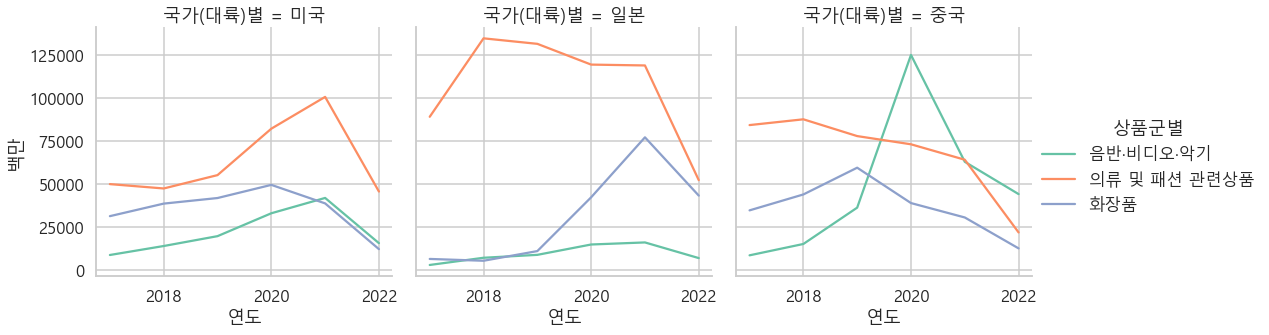

In [20]:
sns.set_context("talk")
sns.set_palette("Set2")
sns.set_style("whitegrid")
plt.rc('font', family='Malgun Gothic') 

sns.relplot(data=df_high_group,x="연도",y="백만",
            col="국가(대륙)별",hue="상품군별",
           kind="line")

# 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

In [68]:
df_temp = pd.read_csv("C:/Users/LG/cmder/data/data/seoul_w.csv",
                         encoding="cp949")
df_temp

,항목,시점,관측지점별,데이터
0,평균기온 (℃),2001.01,서울,-4.1
1,평균기온 (℃),2001.02,서울,-0.3
2,평균기온 (℃),2001.03,서울,5.0
3,평균기온 (℃),2001.04,서울,13.6
4,평균기온 (℃),2001.05,서울,19.1
...,...,...,...,...
247,평균기온 (℃),2021.08,서울,25.9
248,평균기온 (℃),2021.09,서울,22.6
249,평균기온 (℃),2021.10,서울,15.6
250,평균기온 (℃),2021.11,서울,8.2


In [70]:
df_temp = df_temp.drop(["항목"], axis = 1)
df_temp = df_temp.drop(["관측지점별"], axis = 1)

In [71]:
df_temp

,시점,데이터
0,2001.01,-4.1
1,2001.02,-0.3
2,2001.03,5.0
3,2001.04,13.6
4,2001.05,19.1
...,...,...
247,2021.08,25.9
248,2021.09,22.6
249,2021.10,15.6
250,2021.11,8.2


In [74]:
df_temp["시점"] = df_temp["시점"].map(lambda x : str(x))
df_temp["연도"] = df_temp["시점"].map(lambda x : int(x.split(".")[0]))
df_temp["월"] = df_temp["시점"].map(lambda x : int(x.split(".")[1]))
df_temp

,시점,데이터,연도,월
0,2001.01,-4.1,2001,1
1,2001.02,-0.3,2001,2
2,2001.03,5.0,2001,3
3,2001.04,13.6,2001,4
4,2001.05,19.1,2001,5
...,...,...,...,...
247,2021.08,25.9,2021,8
248,2021.09,22.6,2021,9
249,2021.1,15.6,2021,1
250,2021.11,8.2,2021,11


In [78]:
df_temp = df_temp.rename(columns = {"데이터":"온도"})

In [79]:
df_temp

,시점,온도,연도,월
0,2001.01,-4.1,2001,1
1,2001.02,-0.3,2001,2
2,2001.03,5.0,2001,3
3,2001.04,13.6,2001,4
4,2001.05,19.1,2001,5
...,...,...,...,...
247,2021.08,25.9,2021,8
248,2021.09,22.6,2021,9
249,2021.1,15.6,2021,1
250,2021.11,8.2,2021,11


In [82]:
temp_table = df_temp.pivot_table(index="연도",columns="월",values="온도")
temp_table

월,1,2,3,4,5,6,7,8,9,11,12
연도,,,,,,,,,,,
2001,6.20,-0.3,5.0,13.6,19.1,22.5,25.9,26.5,22.5,7.0,-0.6
2002,6.55,2.9,7.6,13.6,18.2,22.2,25.2,24.2,21.6,4.0,1.7
2003,5.70,2.7,6.5,13.2,19.6,21.5,23.8,24.1,20.9,9.5,0.7
2004,6.85,2.3,6.3,13.1,17.6,23.2,24.8,26.1,21.7,9.1,1.9
2005,6.10,-1.9,4.1,13.2,17.7,22.7,25.3,25.1,21.8,8.6,-3.9
2006,8.85,0.1,5.2,11.6,18.4,21.8,23.1,27.0,21.1,8.4,1.4
2007,7.75,4.0,6.1,11.4,18.1,23.2,24.2,26.5,21.5,6.7,1.8
2008,7.20,-1.2,7.3,14.1,17.7,21.5,25.1,25.3,22.0,7.6,1.1
2009,7.00,2.9,6.0,12.7,19.1,22.4,24.3,25.7,21.8,6.9,-1.0


<AxesSubplot:xlabel='월', ylabel='연도'>

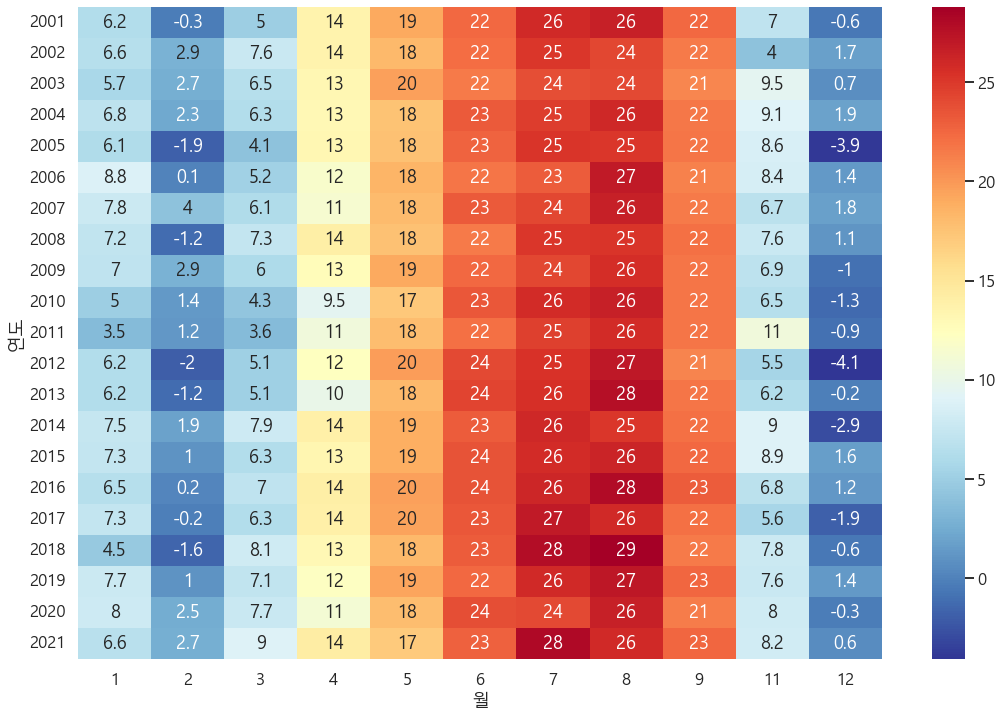

In [110]:
plt.figure(figsize=(18,12))

sns.heatmap(data = temp_table, annot=True,cmap="RdYlBu_r")

In [ ]:
# 영국의 연평균기온이 상승하고 있다는 자료를 보고  heatmap으로 우리나라의 계절별평균기온의 상승을 살펴보았으나
# 현재까지 유의미하게 눈으로 보이는 자료는 없는 것 같다.
# 우리나라의 수도이고 가장 많은 인구가 살고 있는 서울을 대표적으로 조사해보았다.
# 다른 지역사람들도 이러한 유의미한 자료가 있는지 살펴보아야겠다.